In [37]:
import subprocess, pandas as pd, time
import matplotlib.pyplot as plt
import numpy

In [71]:
results = []
for count in range(10):
    for n in [1, 10, 100, 1000, 10000]:
        for np, nc in [(1, 1),(1, 2),(1, 4),(1, 8),(2, 1),(4, 1),(8, 1)]:

            # Command-line arguments for the C program
            arguments = ["wsl", "./produtor_consumidor.o", str(n), str(np), str(nc)]

            # Execute the C program with command-line arguments
            t1 = time.time()
            result = subprocess.run(arguments, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
            t2 = time.time()

            # Check the return code
            if result.returncode == 0:
                print(f"Exec {count} | N {n} | NP {np} | NC {nc} || C program executed successfully.")
                results.append([count+1, n, np, nc, t2-t1])
            else:
                print(f"Exec {count} | N {n} | NP {np} | NC {nc} || Error occurred while executing the C program.")

Exec 0 | N 1 | NP 1 | NC 1 || C program executed successfully.
Exec 0 | N 1 | NP 1 | NC 2 || C program executed successfully.
Exec 0 | N 1 | NP 1 | NC 4 || C program executed successfully.
Exec 0 | N 1 | NP 1 | NC 8 || C program executed successfully.
Exec 0 | N 1 | NP 2 | NC 1 || C program executed successfully.
Exec 0 | N 1 | NP 4 | NC 1 || C program executed successfully.
Exec 0 | N 1 | NP 8 | NC 1 || C program executed successfully.
Exec 0 | N 10 | NP 1 | NC 1 || C program executed successfully.
Exec 0 | N 10 | NP 1 | NC 2 || C program executed successfully.
Exec 0 | N 10 | NP 1 | NC 4 || C program executed successfully.
Exec 0 | N 10 | NP 1 | NC 8 || C program executed successfully.
Exec 0 | N 10 | NP 2 | NC 1 || C program executed successfully.
Exec 0 | N 10 | NP 4 | NC 1 || C program executed successfully.
Exec 0 | N 10 | NP 8 | NC 1 || C program executed successfully.
Exec 0 | N 100 | NP 1 | NC 1 || C program executed successfully.
Exec 0 | N 100 | NP 1 | NC 2 || C program exec

In [72]:
df_results = pd.DataFrame(results, columns=["exec", "n", "np", "nc", "time"])

In [77]:
df_results_grouped = df_results.groupby(['n', 'np', 'nc']).mean()[['time']].reset_index()

In [26]:
df_results_grouped.head(10)

,n,np,nc,time
0,1,1,1,0.676546
1,1,1,2,0.682070
2,1,1,4,0.693081
3,1,1,8,0.687538
4,1,2,1,0.666993
5,1,4,1,0.693571
6,1,8,1,0.713575
7,10,1,1,0.490520
8,10,1,2,0.496937
9,10,1,4,0.512388


In [34]:
np.array(list(df_prov.loc[df_prov['nc'] == nc, 'n']))

[1, 10, 100, 1000, 10000]

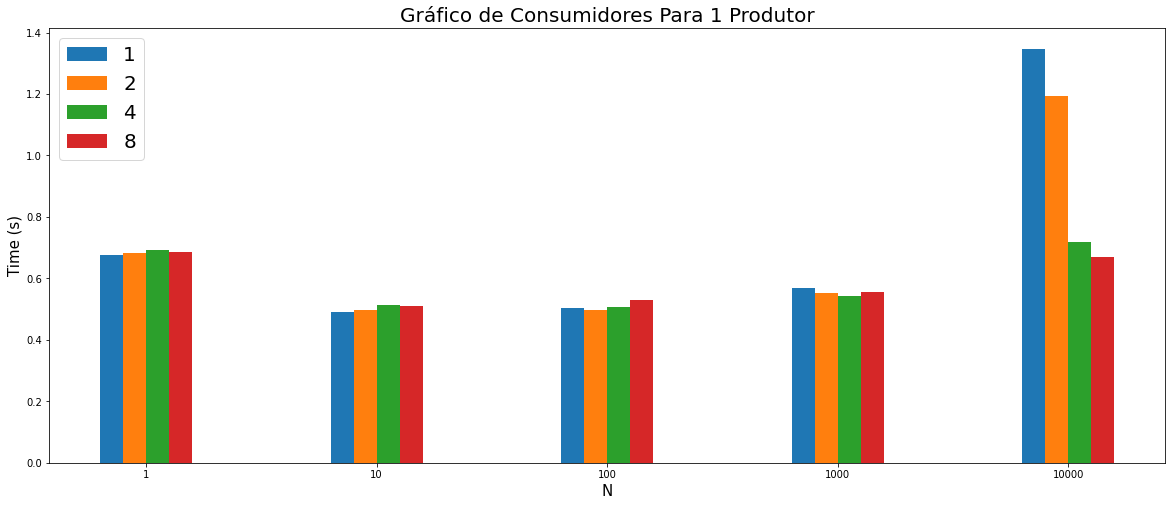

In [189]:
df_prov = df_results_grouped.loc[(df_results_grouped['np'] == 1)]
count = -0.15
plt.figure(figsize=(20,8))
plt.title('Gráfico de Consumidores Para 1 Produtor', fontsize=20)
plt.legend(['A', 'B', 'C', 'D'])
for nc in [1,2,4,8]:
    df_use = df_prov.loc[df_prov['nc'] == nc]
    plt.bar(
        numpy.arange(len(df_use)) + count,
        numpy.array(df_use['time']), 
        width= 0.1
    )
    count += 0.1
plt.legend([1,2,4,8], loc='upper left', prop={'size': 20})
plt.xticks([0,1,2,3,4], [1, 10, 100, 1000, 10000])
plt.xlabel('N', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.show();

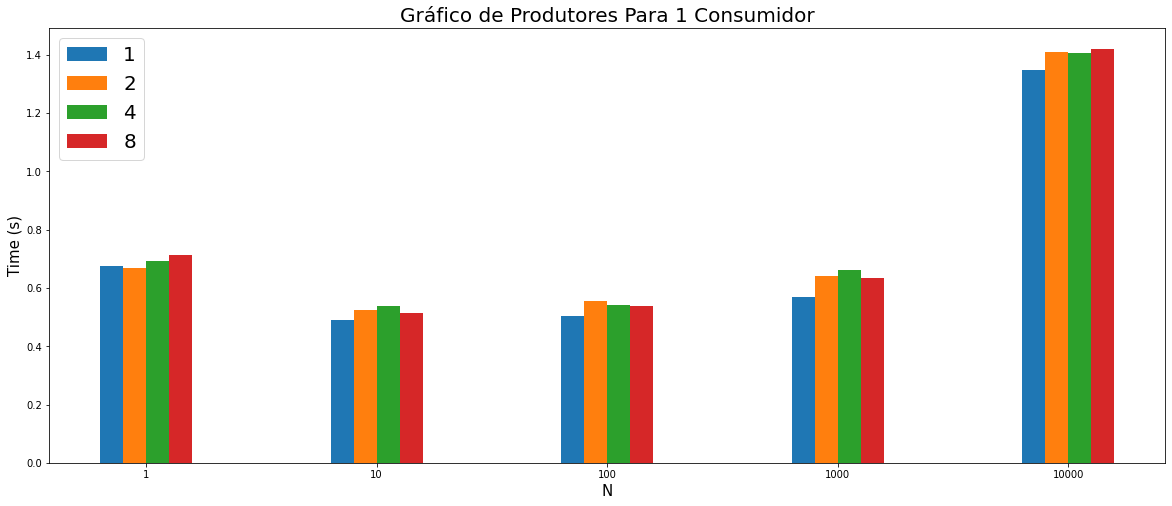

In [191]:
df_prov = df_results_grouped.loc[(df_results_grouped['nc'] == 1)]
count = -0.15
plt.figure(figsize=(20,8))
plt.title('Gráfico de Produtores Para 1 Consumidor', fontsize=20)
plt.legend(['A', 'B', 'C', 'D'])
for np in [1,2,4,8]:
    df_use = df_prov.loc[df_prov['np'] == np]
    plt.bar(
        numpy.arange(len(df_use)) + count,
        numpy.array(df_use['time']), 
        width= 0.1
    )
    count += 0.1
plt.legend([1,2,4,8], loc='upper left', prop={'size': 20})
plt.xticks([0,1,2,3,4], [1, 10, 100, 1000, 10000])
plt.xlabel('N', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.show();